In [1]:
from keras.datasets import boston_housing

Using TensorFlow backend.


In [2]:
(train_data,train_targets) , (test_data,test_targets) = boston_housing.load_data()

In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

In [5]:
mean = train_data.mean(axis=0)
train_data -= mean

std = train_data.std(axis=0)
train_data /= std

In [6]:
test_data -= mean
test_data /= std

In [7]:
from keras import models
from keras import layers

In [8]:
def build_model():
    model = models.Sequential()
    
    model.add(layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    
    return model

In [9]:
import numpy as np

In [10]:
k=4
num_val_samples = len(train_data) // k
num_epochs = 100

all_scores = []

In [11]:
for i in range(k):
    print('processing fold #', i)
    val_data =train_data[i * num_val_samples : (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i+1) * num_val_samples:]], axis =0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i+1) * num_val_samples:]], axis =0)
    
    model  =build_model()
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
    
    val_mse, val_mae = model.evaluate(val_data,val_targets,verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [12]:
all_scores

[2.4369266033172607, 2.7602853775024414, 2.938586950302124, 2.7551283836364746]

In [13]:
np.mean(all_scores)

2.722731828689575

In [14]:
from datetime import datetime

In [20]:
num_epochs = 500
all_mae_histories = []

start = datetime.now()
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
    
    model = build_model()
    
    history = model.fit(partial_train_data,partial_train_targets,validation_data=(val_data, val_targets), epochs=num_epochs,batch_size=1,verbose=0)
    
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
    
    print('---------------------time taken = ', datetime.now()-start)

    

processing fold # 0
---------------------time taken =  0:05:11.858958
processing fold # 1
---------------------time taken =  0:10:34.743466
processing fold # 2
---------------------time taken =  0:16:21.140094
processing fold # 3
---------------------time taken =  0:22:04.936675


In [21]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [24]:
import matplotlib.pyplot as plt

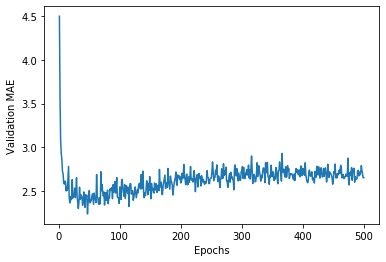

In [25]:
plt.plot(range(1,len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [28]:
def smooth_curve(points,factor=0.9):
    
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point *(1-factor))
        else:
            smoothed_points.append(point)
            
    return smoothed_points

smooth_mae_history=(smooth_curve(average_mae_history[10:]))


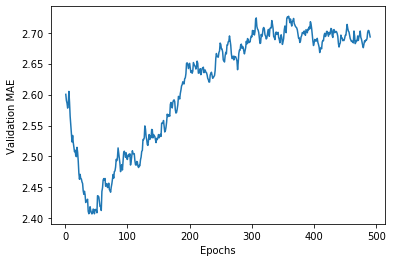

In [29]:
plt.plot(range(1,len(smooth_mae_history)+1),smooth_mae_history)

plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.show()

In [30]:
model = build_model()

model.fit(train_data,train_targets,epochs=80,batch_size=16,verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 195us/step


In [31]:
test_mae_score

2.812063455581665

In [32]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])